# Capstone Project : 4
# Project ID : PRCP-1013-WalkRunClass
# Project Team ID : PTID-CDS-JUN-24-1963

# Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.


# Import libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [115]:
data=pd.read_csv('walkrun.csv')
data

date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922  
...               ...             ...             ...     ...     ...     ...  
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814  

[88588 rows x 11 columns]

### Insights
#### Data Attributes:

* **Date and Time**: These attributes provide the timestamp for each recorded data point. They may be useful for analyzing patterns over time and establishing when the activities occurred.
* **Username**: Indicates the user associated with the data. It could be relevant for user-specific analysis or personalized activity recommendations.
* **Wrist**: Specifies the wrist (left or right) where the wearable sensor was placed. This attribute can impact the sensor data due to differences in motion patterns between wrists.
* **Activity**: The target variable, representing the activity being performed (walking or running). This is the label you're trying to predict.
* **Acceleration (X, Y, Z)**: These attributes provide acceleration data in three axes (X, Y, and Z). They are crucial for understanding the movement patterns of walking and running.
* **Gyroscope (X, Y, Z)**: Gyroscope data captures angular velocity around the X, Y, and Z axes. It can help in identifying the rotational aspects of activities.

### Basic Checks

In [60]:
data.head()

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922

In [61]:
data.tail()

date               time username  wrist  activity  acceleration_x  \
88583  2017-7-9  20:9:15:317911028   viktor      0         0          0.3084   
88584  2017-7-9  20:9:15:517889022   viktor      0         0          0.4977   
88585  2017-7-9  20:9:15:717828989   viktor      0         0          0.4587   
88586  2017-7-9  20:9:15:917932987   viktor      0         0          0.2590   
88587  2017-7-9  20:9:16:117410004   viktor      0         0          0.3140   

       acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
88583         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587         -0.8008         -0.0911  0.1183  1.0850  1.2814

In [62]:
data.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [65]:
#Remove duplicates:
data.drop_duplicates(inplace=True)

In [66]:
data['activity']=data['activity'].astype('float64')
data['wrist']=data['wrist'].astype('float64')

# Converting date column

In [67]:
data['date']=pd.to_datetime(data['date'])

In [68]:
data['days'] = pd.to_datetime(data['date'], format='%y%m%d').dt.day
data['month'] = pd.to_datetime(data['date'], format='%y%m%d').dt.month

In [69]:
data.drop("date", axis=1,inplace=True)

In [70]:
data.head()

time username  wrist  activity  acceleration_x  \
0  13:51:15:847724020   viktor    0.0       0.0          0.2650   
1  13:51:16:246945023   viktor    0.0       0.0          0.6722   
2  13:51:16:446233987   viktor    0.0       0.0          0.4399   
3  13:51:16:646117985   viktor    0.0       0.0          0.3031   
4  13:51:16:846738994   viktor    0.0       0.0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  days  month  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296    30      6  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269    30      6  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367    30      6  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336    30      6  
4         -0.9312          0.0359  0.0527  0.4379  2.4922    30      6

## Function to split the time into hours, minutes, seconds, and milliseconds

In [71]:
def split_time(time_str):
    hours, minutes, seconds, milliseconds = map(int, time_str.split(':'))
    return hours, minutes, seconds, milliseconds

# Apply the function to the 'time' column
data[['hours', 'minutes', 'seconds', 'milliseconds']] = data['time'].apply(lambda x: pd.Series(split_time(x)))

# Converting to Minutes

In [72]:
#now we need to convert min sec & millsec to the minutes then
def time_to_minutes(time_str):
    # Split the input time string
    hh, mm, ss, ms = map(int, time_str.split(':'))

    # Convert to minutes
    total_minutes = ((hh * 60) + mm + (ss / 60) + (ms / 60000))/(hh*60)#(hh*60) bez we have a hours as separate  column..

    return total_minutes

data['minutes'] = data['time'].apply(time_to_minutes)

In [74]:
#Remove irrelevant data
data.drop(['username','seconds','milliseconds','time',],axis=1,inplace=True)#drop unneccessary columns

In [75]:
data.head()

wrist  activity  acceleration_x  acceleration_y  acceleration_z  gyro_x  \
0    0.0       0.0          0.2650         -0.7814         -0.0076 -0.0590   
1    0.0       0.0          0.6722         -1.1233         -0.2344 -0.1757   
2    0.0       0.0          0.4399         -1.4817          0.0722 -0.9105   
3    0.0       0.0          0.3031         -0.8125          0.0888  0.1199   
4    0.0       0.0          0.4814         -0.9312          0.0359  0.0527   

   gyro_y  gyro_z  days  month  hours    minutes  
0  0.0325 -2.9296    30      6     13  19.179466  
1  0.0208  0.1269    30      6     13   6.342330  
2  0.1063 -2.4367    30      6     13  10.600641  
3 -0.4099 -2.9336    30      6     13  14.871666  
4  0.4379  2.4922    30      6     13  19.158440

In [29]:
data['activity'].value_counts()

activity
1.0    44365
0.0    44223
Name: count, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wrist           88588 non-null  float64
 1   activity        88588 non-null  float64
 2   acceleration_x  88588 non-null  float64
 3   acceleration_y  88588 non-null  float64
 4   acceleration_z  88588 non-null  float64
 5   gyro_x          88588 non-null  float64
 6   gyro_y          88588 non-null  float64
 7   gyro_z          88588 non-null  float64
 8   days            88588 non-null  int32  
 9   month           88588 non-null  int32  
 10  hours           88588 non-null  int64  
 11  minutes         88588 non-null  float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 7.4 MB


# EDA

In [17]:
#Summary statistics
data.describe()

wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z          days  \
count    88588.000000  88588.000000  88588.000000  88588.000000  88588.000000   
mean        -0.313956      0.004160      0.037203      0.022327     11.997584   
std          0.486815      1.253423      1.198725      1.914423      6.436148   
min         -3.753800     -4.430600     -7.464700     -9.480000      1.000000   
25%         -0.376000     -0.920700     -0.644825     -1.345125      6.000000   
50%         -0.221000      0.018700      0.039300      0.006900     11.000000   
75%         -0.085900      0.888800      0.733700      1.398200     16.000000   
max          1.640300      4.874200      8.498000     11.266200     30.000000   

              month         hours       minutes       seconds  milliseconds  
count  88588.000000  88588.000000  88588.000000  88588.000000  8.858800e+04  
mean       6.954937     16.880051      9.340154     29.556294  4.934032e+08  
std        0.207442      2.299033      5.102530     17.265297  2.883193e+08  
min        6.000000     11.000000      1.046312      0.000000  2.660150e+05  
25%        7.000000     15.000000      4.970833     15.000000  2.422258e+08  
50%        7.000000     17.000000      9.004943     30.000000  4.855105e+08  
75%        7.000000     19.000000     13.352766     44.000000  7.460755e+08  
max        7.000000     21.000000     25.056212     59.000000  9.999940e+08

In [19]:
#Correlation matrix
corr_matrix=data.corr()
corr_matrix

wrist  activity  acceleration_x  acceleration_y  \
wrist           1.000000 -0.113404       -0.609579        0.087091   
activity       -0.113404  1.000000       -0.017747        0.639520   
acceleration_x -0.609579 -0.017747        1.000000       -0.265169   
acceleration_y  0.087091  0.639520       -0.265169        1.000000   
acceleration_z  0.323680 -0.192435       -0.552374        0.106220   
gyro_x         -0.022092  0.040856       -0.021705        0.010549   
gyro_y         -0.068403  0.012055       -0.004091        0.072170   
gyro_z          0.008796 -0.008106       -0.060849       -0.022994   
days            0.437214 -0.114293       -0.245871        0.011228   
month           0.227086 -0.081821       -0.174439       -0.026161   
hours          -0.243397  0.760193        0.072627        0.481548   
minutes         0.054815 -0.222877       -0.007287       -0.144632   

                acceleration_z    gyro_x    gyro_y    gyro_z      days  \
wrist                 0.323680 -0.022092 -0.068403  0.008796  0.437214   
activity             -0.192435  0.040856  0.012055 -0.008106 -0.114293   
acceleration_x       -0.552374 -0.021705 -0.004091 -0.060849 -0.245871   
acceleration_y        0.106220  0.010549  0.072170 -0.022994  0.011228   
acceleration_z        1.000000  0.035296 -0.021004  0.049621  0.243741   
gyro_x                0.035296  1.000000  0.094011  0.317769 -0.009496   
gyro_y               -0.021004  0.094011  1.000000  0.287244 -0.032936   
gyro_z                0.049621  0.317769  0.287244  1.000000  0.005699   
days                  0.243741 -0.009496 -0.032936  0.005699  1.000000   
month                 0.048062 -0.012304 -0.017153  0.003322 -0.607614   
hours                -0.154580  0.033631  0.019851 -0.007953 -0.070229   
minutes               0.040665 -0.011499 -0.003342  0.002978  0.038605   

                   month     hours   minutes  
wrist           0.227086 -0.243397  0.054815  
activity       -0.081821  0.760193 -0.222877  
acceleration_x -0.174439  0.072627 -0.007287  
acceleration_y -0.026161  0.481548 -0.144632  
acceleration_z  0.048062 -0.154580  0.040665  
gyro_x         -0.012304  0.033631 -0.011499  
gyro_y         -0.017153  0.019851 -0.003342  
gyro_z          0.003322 -0.007953  0.002978  
days           -0.607614 -0.070229  0.038605  
month           1.000000 -0.178653  0.029381  
hours          -0.178653  1.000000 -0.275761  
minutes         0.029381 -0.275761  1.000000

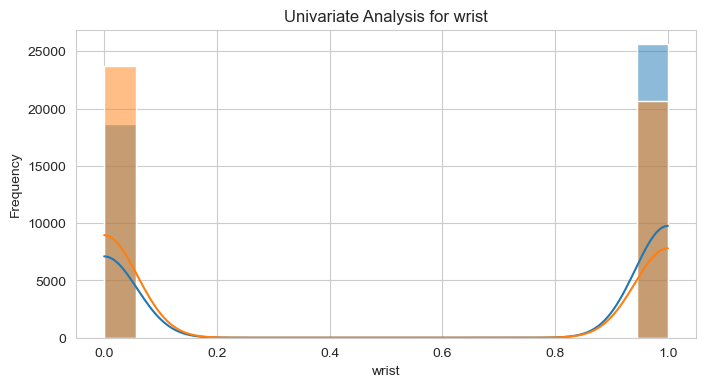

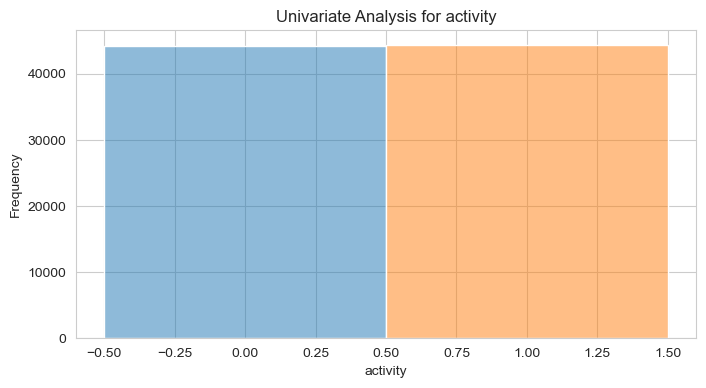

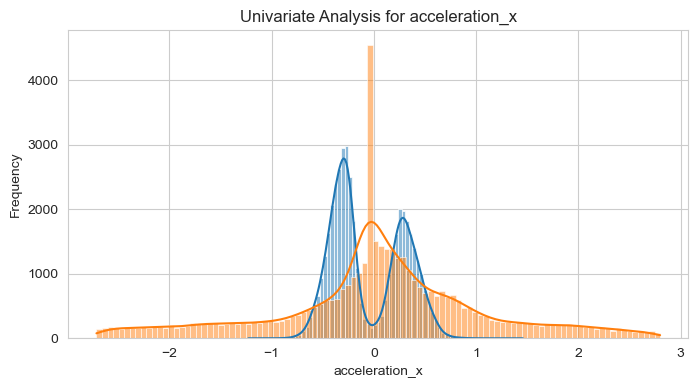

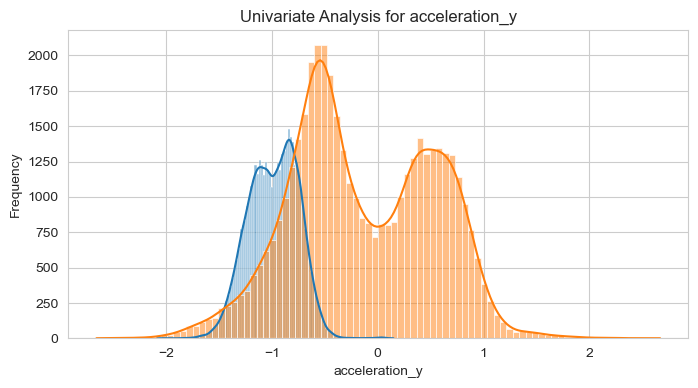

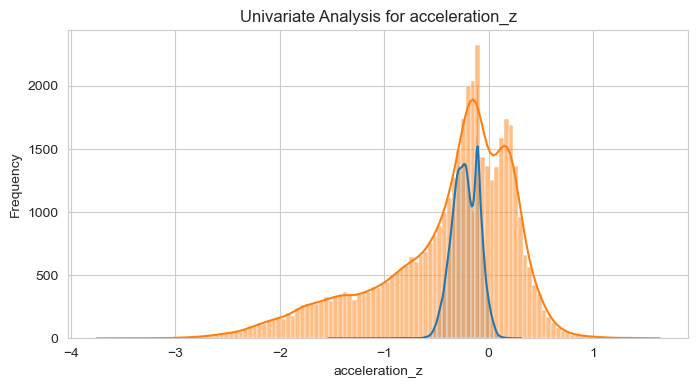

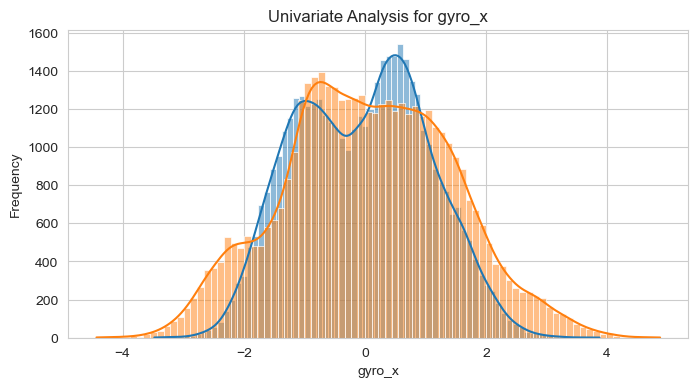

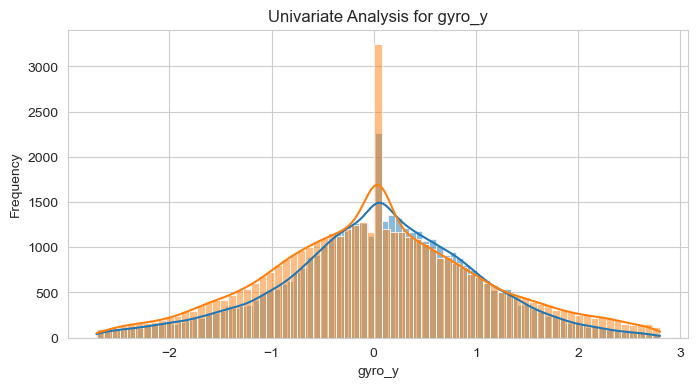

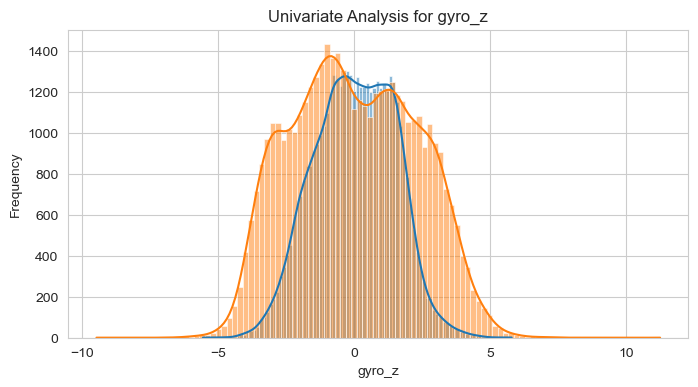

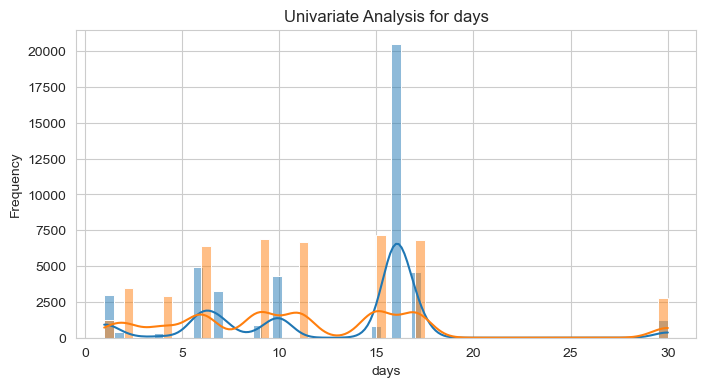

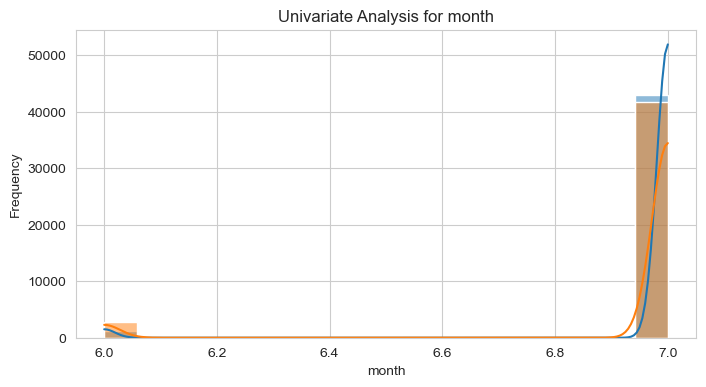

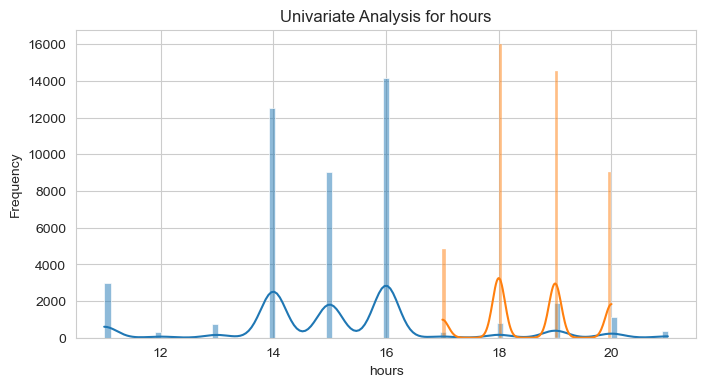

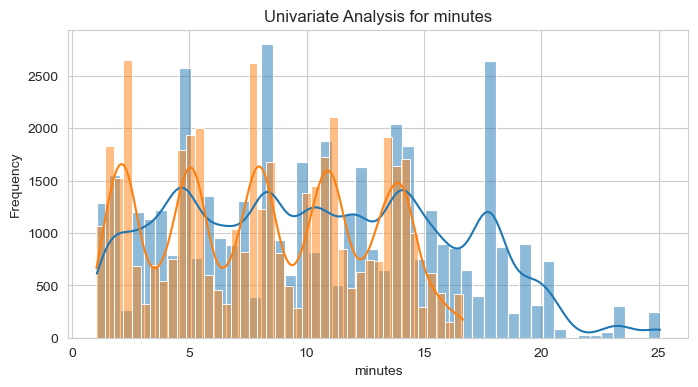

In [52]:
for feature in data:
    plt.figure(figsize=(8, 4))
    
    # Create a separate plot for each class (activity)
    for activity in data['activity'].unique():
        subset = data[data['activity'] == activity]
        sns.histplot(subset[feature], kde=True, label=activity)
    
    plt.title(f'Univariate Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.show()

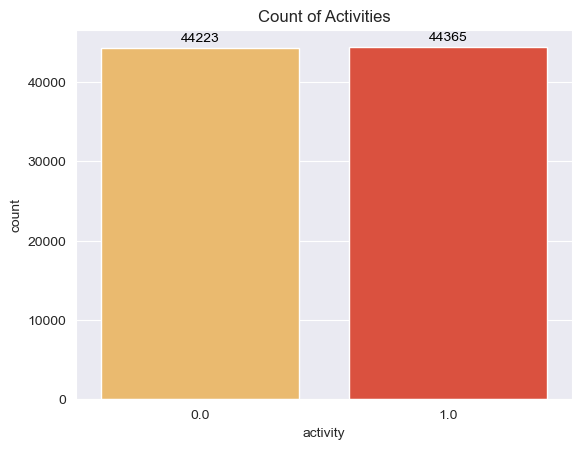

In [20]:
# Visualizations
# Count plot for activity
sns.set_style(style='darkgrid')
annote=sns.countplot(x='activity', data=data, palette='YlOrRd')
# Add annotations for each bar
for p in annote.patches:
    annote.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Count of Activities')
plt.show()

# Bivariate Analysis

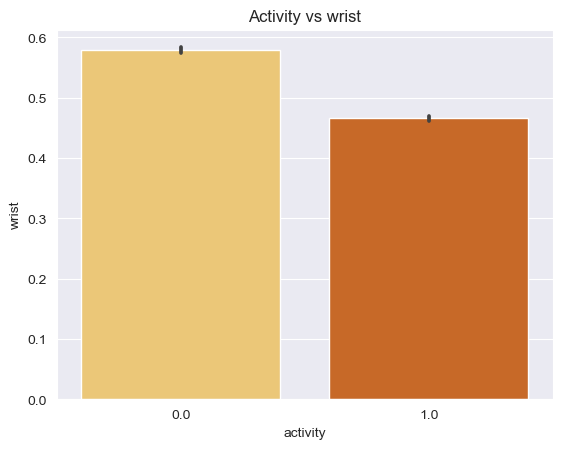

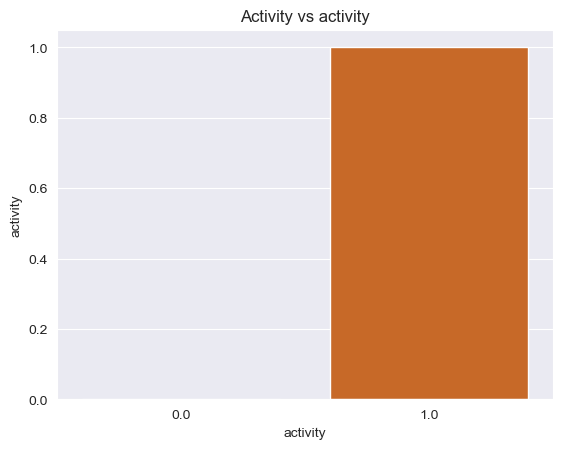

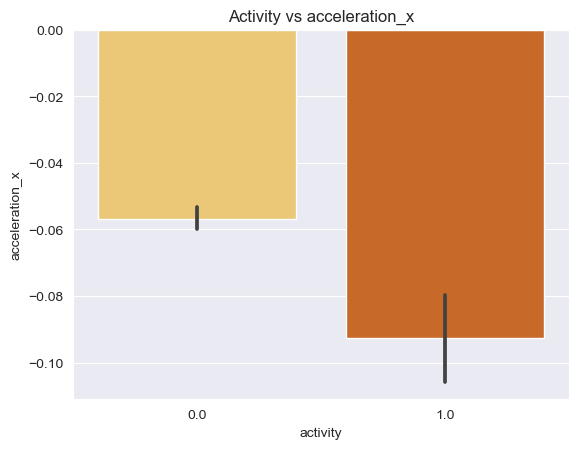

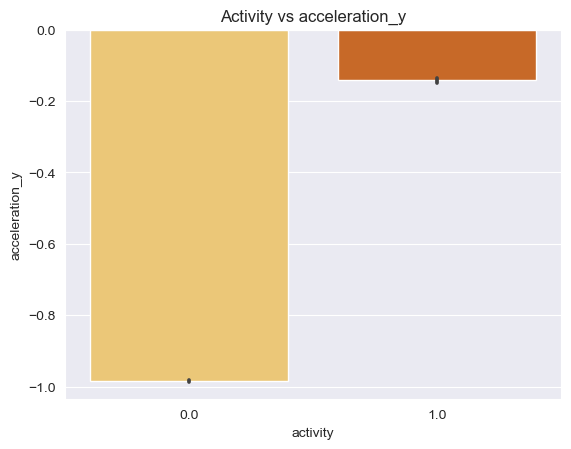

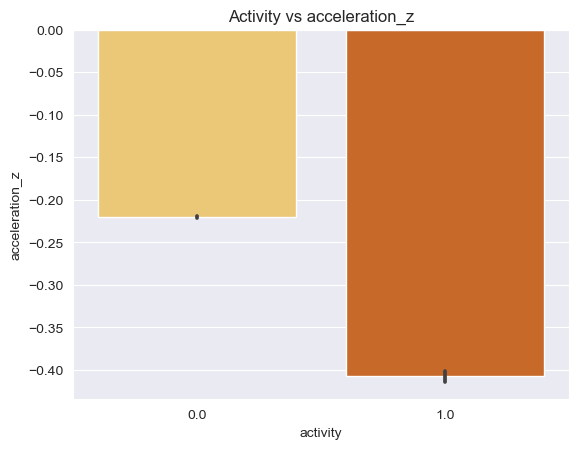

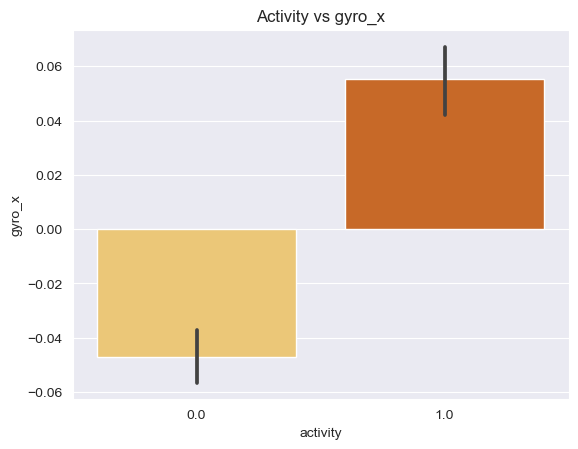

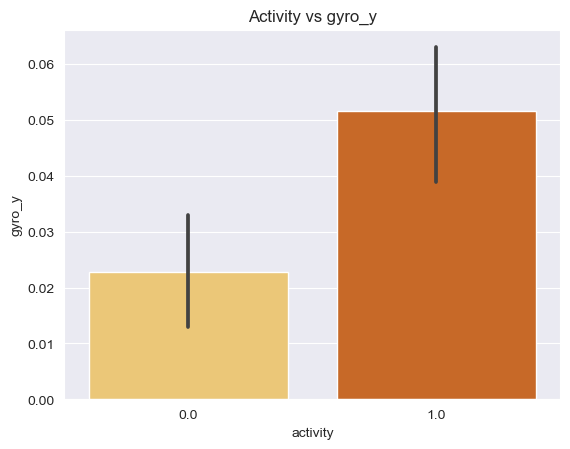

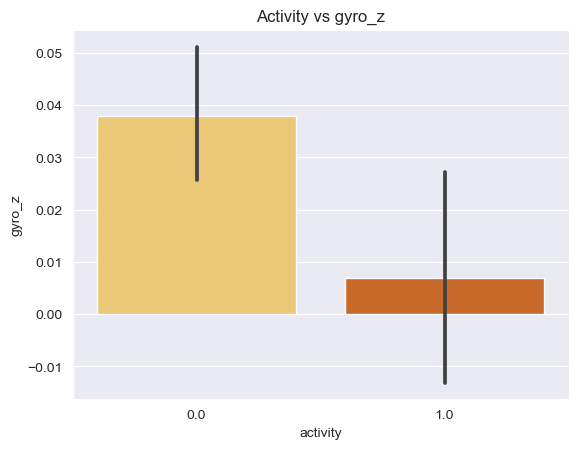

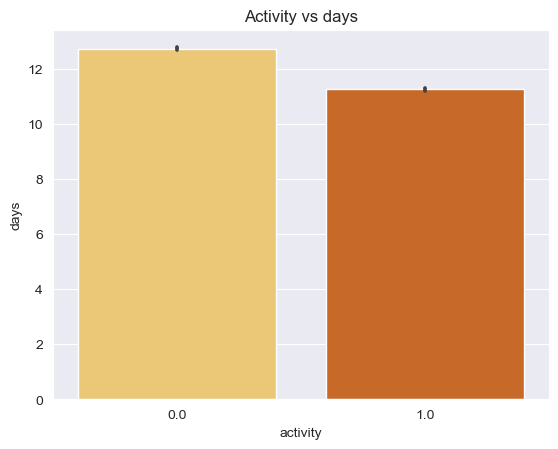

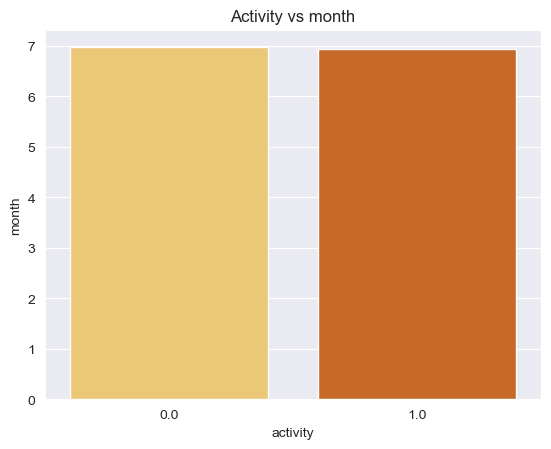

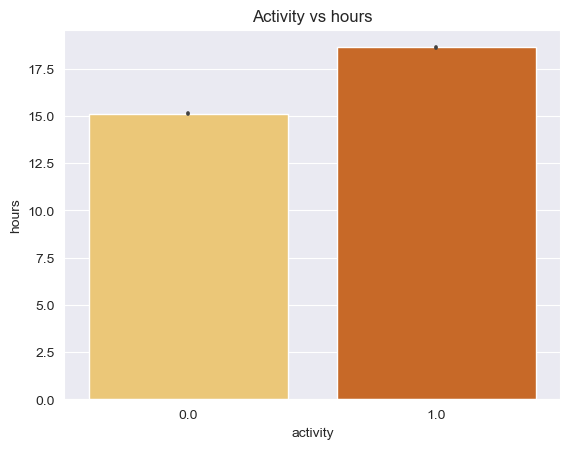

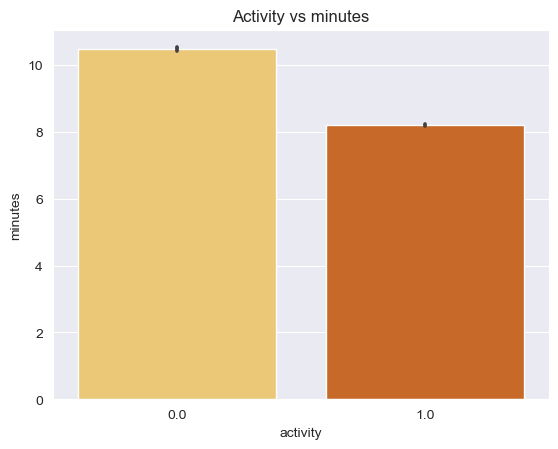

In [21]:
#Bar chart for activity vs other coulumns
for features in data:
    sns.barplot(data=data,x=data['activity'],y=features,palette='YlOrBr')
    plt.title(f'Activity vs {features}')
    plt.show()

# Checking Outliers

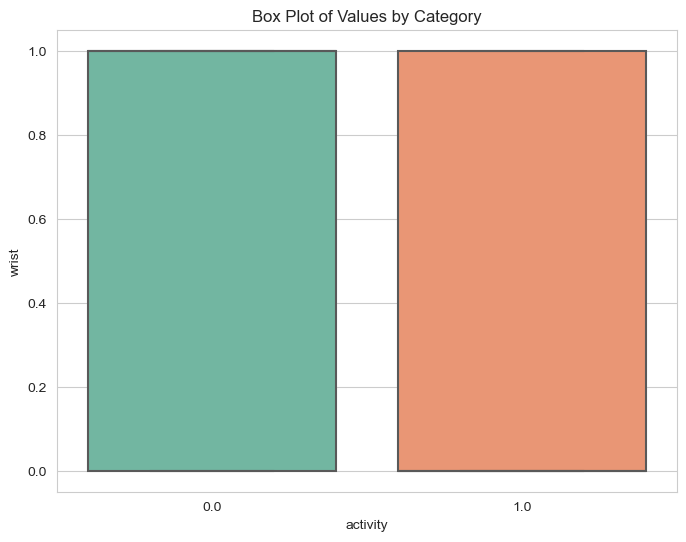

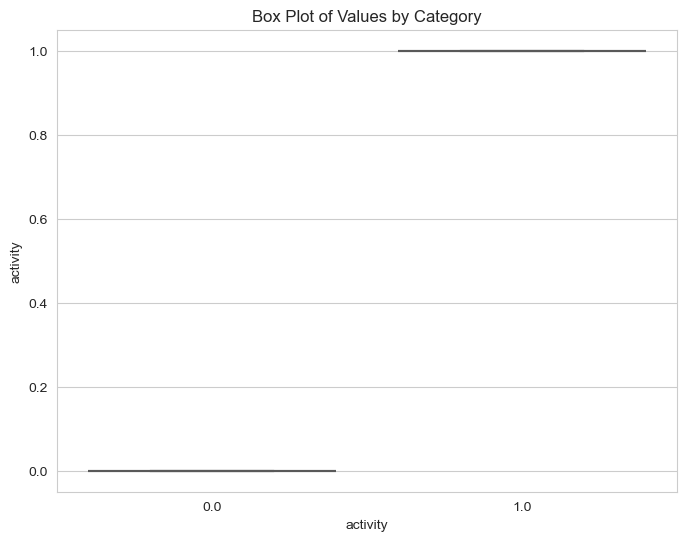

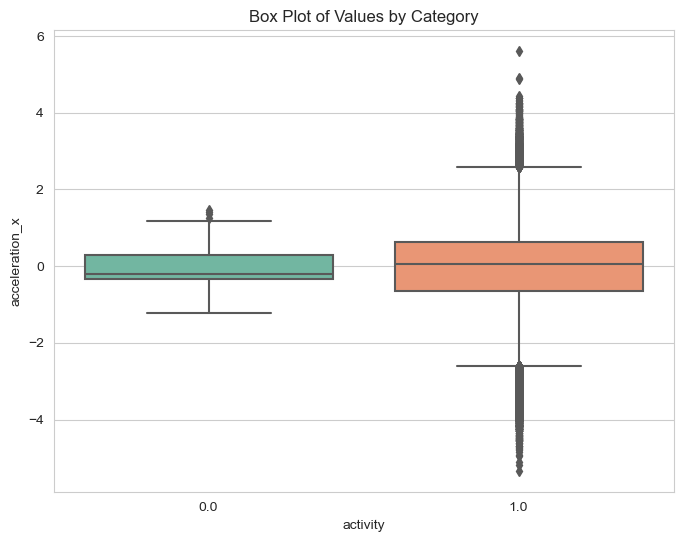

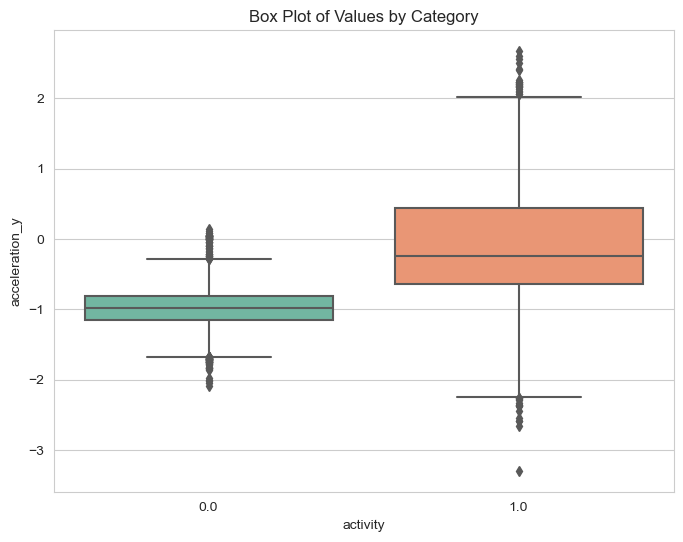

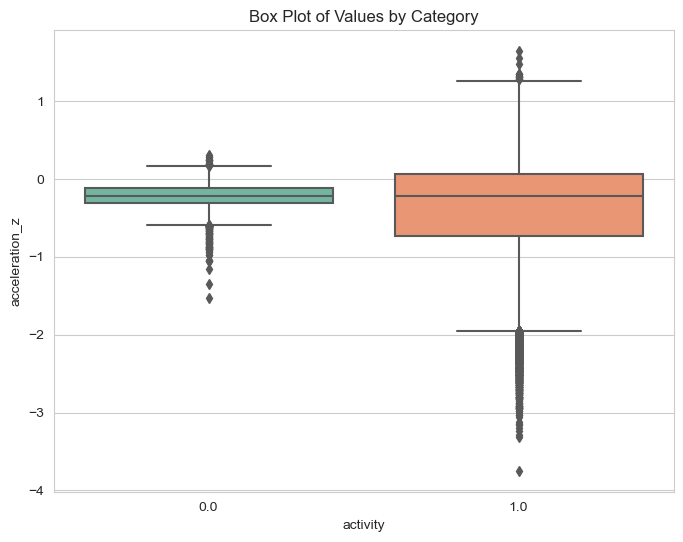

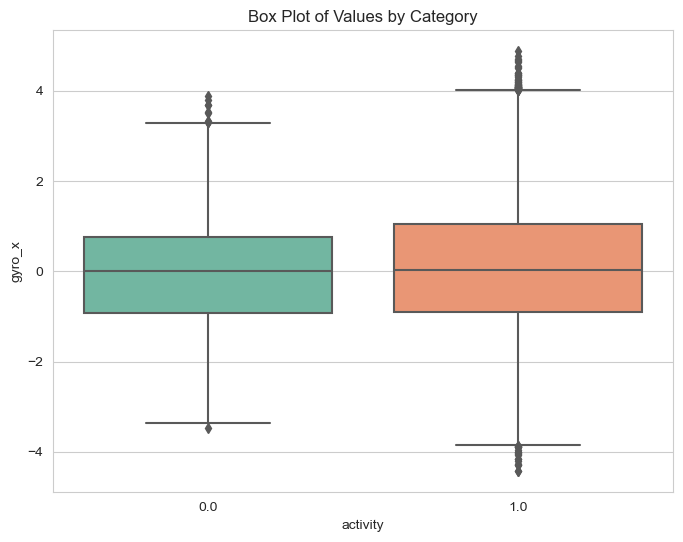

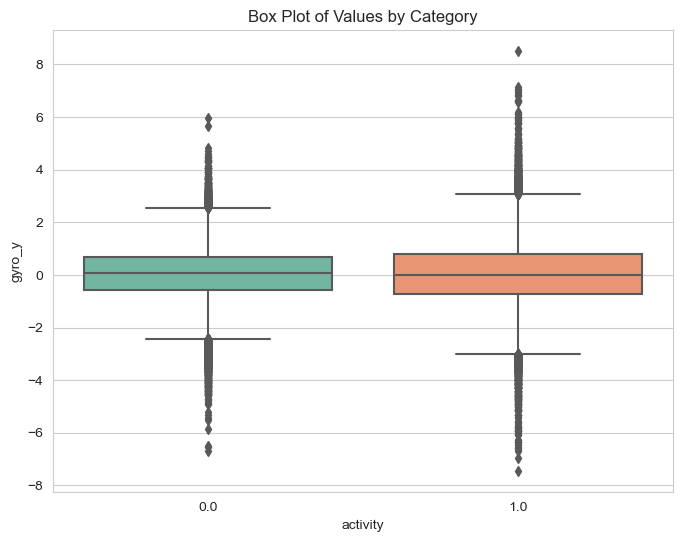

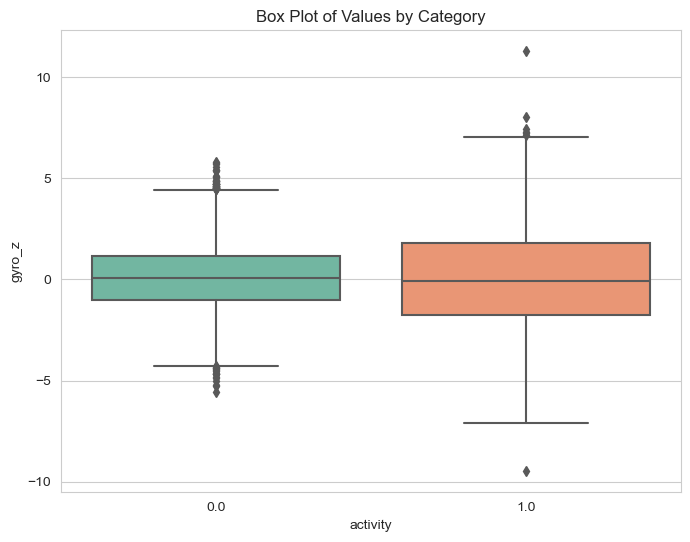

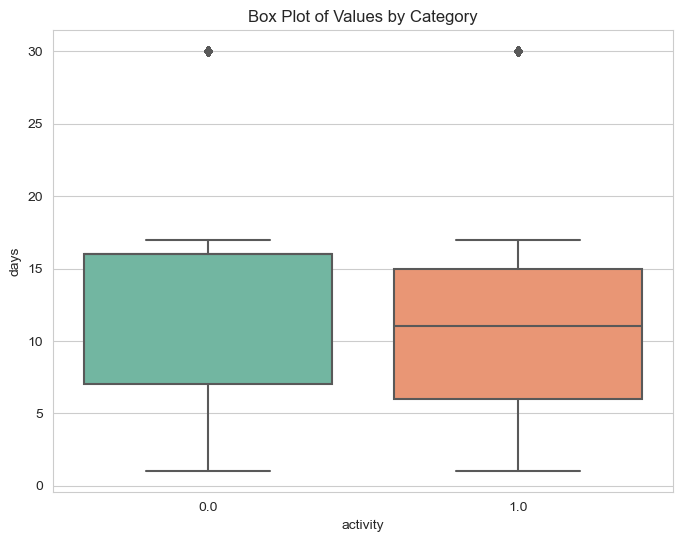

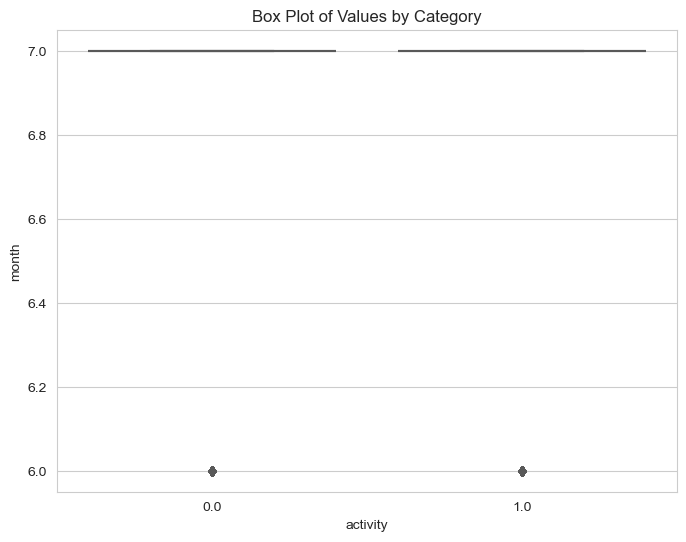

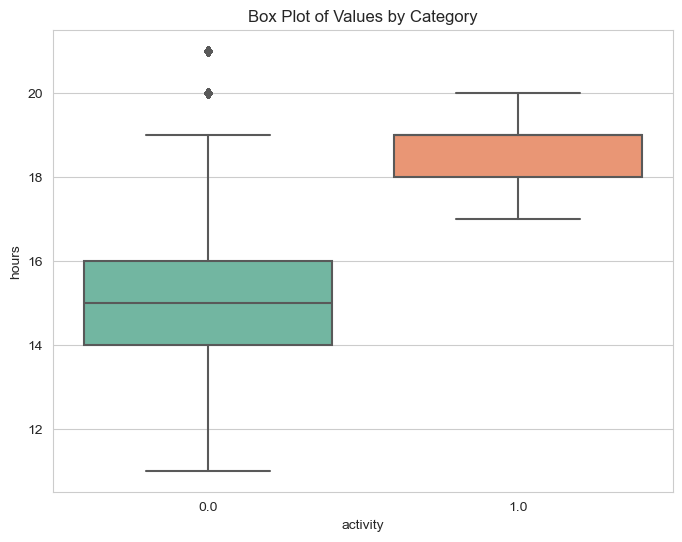

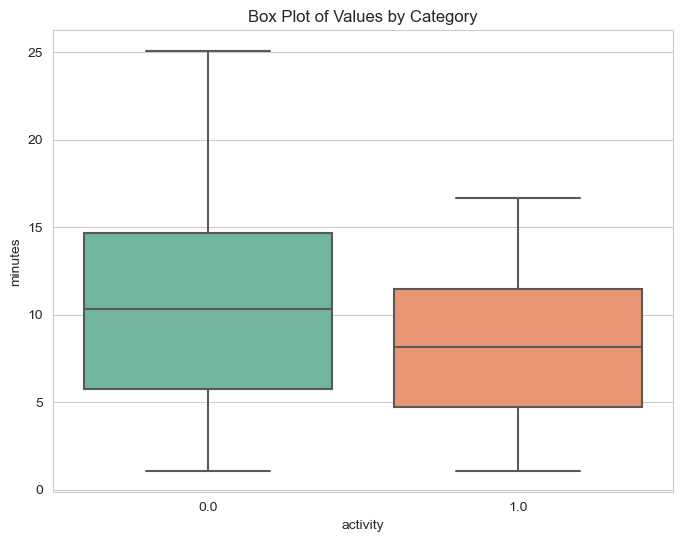

In [22]:
#Box plot for activity
for features in data:
    plt.figure(figsize=(8,6))
    sns.set_style('whitegrid')
    sns.boxplot(x='activity', y=features, data=data, palette='Set2')
    plt.title('Box Plot of Values by Category')
    plt.show()


# Multivariate Analysis

<Figure size 1800x1600 with 0 Axes>

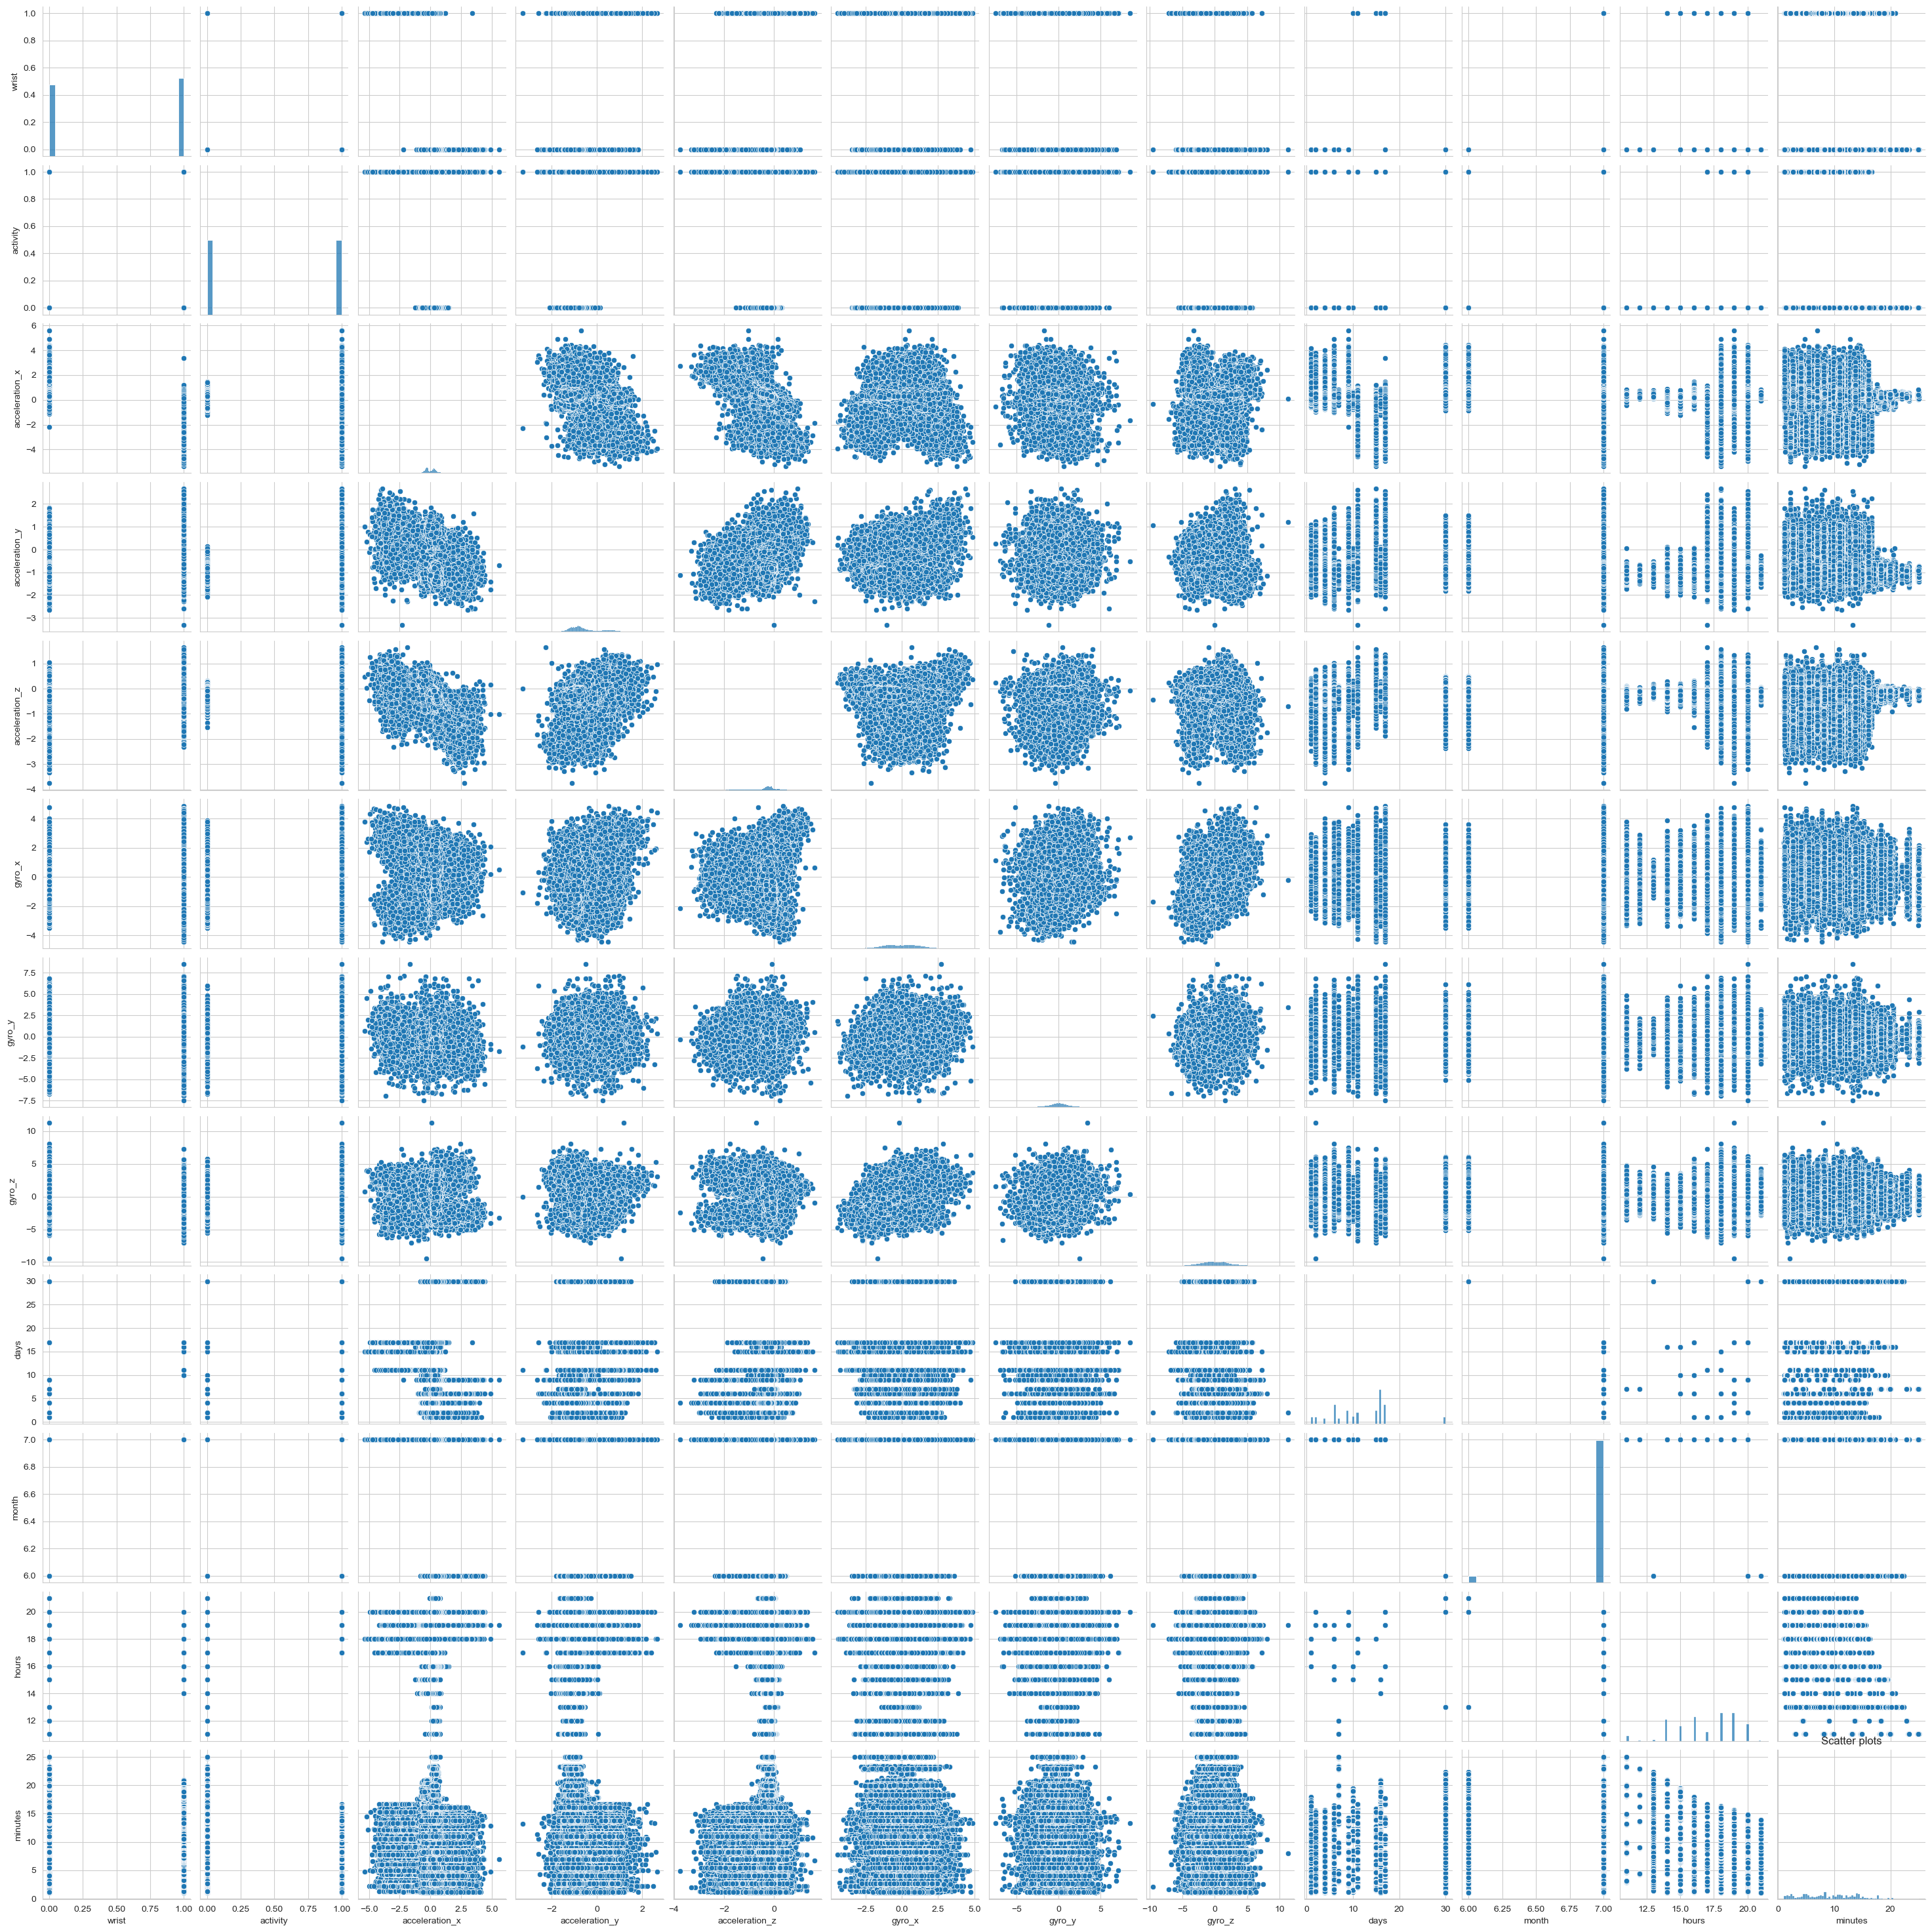

In [23]:
#Scatter plots
plt.figure(figsize=(18,16))
sns.pairplot(data)
plt.title('Scatter plots')
plt.show()

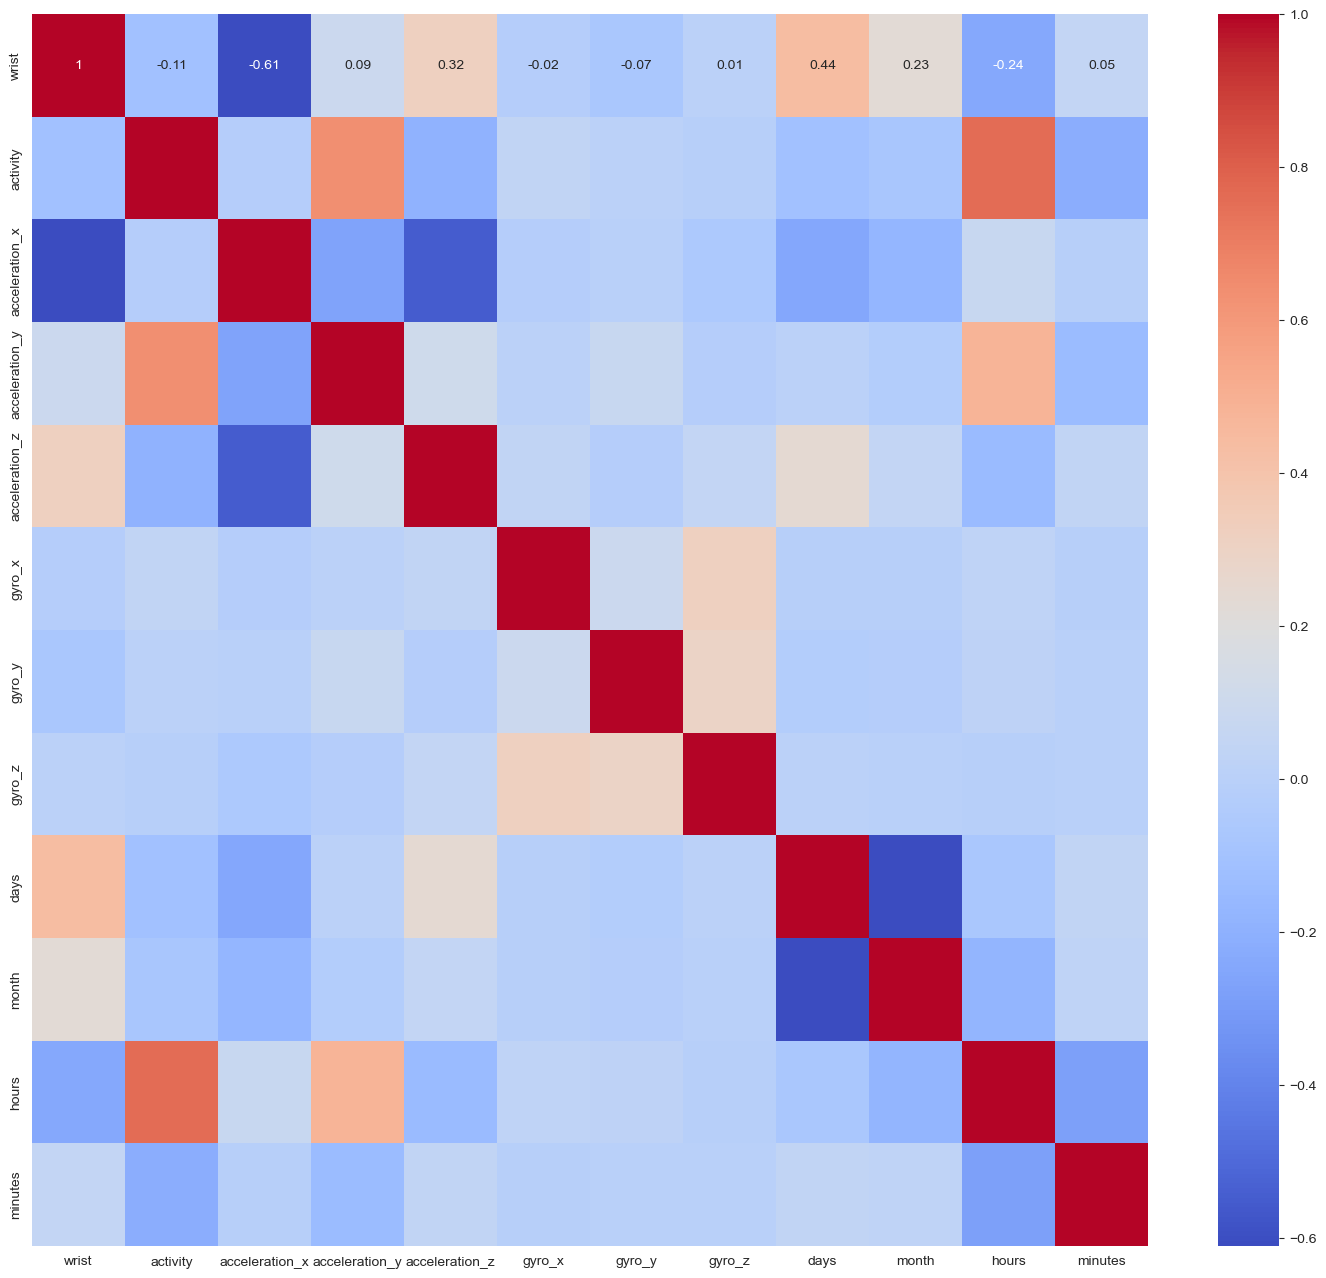

In [24]:
#heatmap for correlation  matrix
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix.round(2),annot=True,cmap='coolwarm')
plt.show()

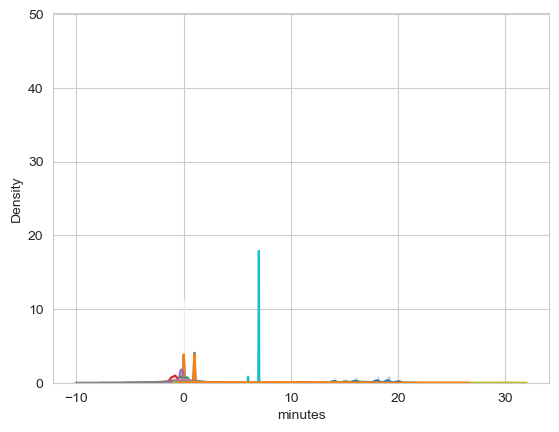

In [25]:
#Distribution plots
for column in data.columns:
    sns.distplot(data[column])


In [76]:
Q1 = data['acceleration_x'].quantile(0.25)
Q3 = data['acceleration_x'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['acceleration_x'] < lower_bound) | (data['acceleration_x'] > upper_bound)]
print(outliers)

       wrist  activity  acceleration_x  acceleration_y  acceleration_z  \
761      0.0       1.0          1.5466         -1.1082         -0.2509   
794      0.0       1.0          1.5584         -1.0274         -0.3310   
804      0.0       1.0          3.3880         -0.1490         -0.1416   
806      0.0       1.0          2.1690         -0.8969         -0.4853   
807      0.0       1.0          3.4887         -1.0723         -0.1066   
...      ...       ...             ...             ...             ...   
87729    0.0       1.0          2.2489         -0.5623         -1.8833   
87731    0.0       1.0          1.8530         -1.2641         -1.9198   
87737    0.0       1.0          1.4954         -1.0511         -1.6060   
87752    0.0       1.0          2.5963         -0.4055         -2.4827   
87754    0.0       1.0          2.2590         -1.5834         -2.7183   

       gyro_x  gyro_y  gyro_z  days  month  hours    minutes  
761    0.8609 -0.4994 -1.6458    30      6     2

In [35]:
Q1 = data['acceleration_z'].quantile(0.25)
Q3 = data['acceleration_z'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['acceleration_z'] < lower_bound) | (data['acceleration_z'] > upper_bound)]
print(outliers)

       wrist  activity  acceleration_x  acceleration_y  acceleration_z  \
817      0.0       1.0          2.8641         -1.0998         -0.8614   
821      0.0       1.0          2.8314         -0.9437         -0.9767   
825      0.0       1.0          3.0883         -1.4509         -1.0165   
829      0.0       1.0          2.7703         -1.5968         -1.1892   
831      0.0       1.0          3.1003         -0.9753         -0.9276   
...      ...       ...             ...             ...             ...   
87748    0.0       1.0          0.9145          0.1193         -1.0218   
87750    0.0       1.0          0.4733         -0.8527         -1.1410   
87752    0.0       1.0          2.5963         -0.4055         -2.4827   
87753    0.0       1.0         -0.5401         -0.3176          0.5294   
87754    0.0       1.0          2.2590         -1.5834         -2.7183   

       gyro_x  gyro_y  gyro_z  days  month  hours    minutes  
817   -0.5602 -0.6288  2.4683    30      6     2

In [77]:
Q1 = data['gyro_y'].quantile(0.25)
Q3 = data['gyro_y'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['gyro_y'] < lower_bound) | (data['gyro_y'] > upper_bound)]
print(outliers)


       wrist  activity  acceleration_x  acceleration_y  acceleration_z  \
806      0.0       1.0          2.1690         -0.8969         -0.4853   
913      0.0       1.0          2.7474         -0.7081         -0.4079   
919      0.0       1.0          1.8398         -0.6768         -2.0770   
939      0.0       1.0          4.2238         -0.5313         -0.0497   
949      0.0       1.0          2.4385         -1.0021         -0.3412   
...      ...       ...             ...             ...             ...   
88348    0.0       0.0          0.2878         -0.9886         -0.1019   
88354    0.0       0.0          0.2176         -0.8891         -0.0477   
88371    0.0       0.0          0.1562         -0.8103         -0.0847   
88420    0.0       0.0          0.3347         -0.9211         -0.2104   
88554    0.0       0.0          0.3871         -1.2326         -0.1181   

       gyro_x  gyro_y  gyro_z  days  month  hours    minutes  
806   -1.0288  3.0830  3.2277    30      6     2

In [78]:
Q1 = data['gyro_y'].quantile(0.25)
Q3 = data['gyro_y'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['gyro_y'] < lower_bound) | (data['gyro_y'] > upper_bound)]
print(outliers)

       wrist  activity  acceleration_x  acceleration_y  acceleration_z  \
806      0.0       1.0          2.1690         -0.8969         -0.4853   
913      0.0       1.0          2.7474         -0.7081         -0.4079   
919      0.0       1.0          1.8398         -0.6768         -2.0770   
939      0.0       1.0          4.2238         -0.5313         -0.0497   
949      0.0       1.0          2.4385         -1.0021         -0.3412   
...      ...       ...             ...             ...             ...   
88348    0.0       0.0          0.2878         -0.9886         -0.1019   
88354    0.0       0.0          0.2176         -0.8891         -0.0477   
88371    0.0       0.0          0.1562         -0.8103         -0.0847   
88420    0.0       0.0          0.3347         -0.9211         -0.2104   
88554    0.0       0.0          0.3871         -1.2326         -0.1181   

       gyro_x  gyro_y  gyro_z  days  month  hours    minutes  
806   -1.0288  3.0830  3.2277    30      6     2

# Impute Outliers with median

In [79]:
median_value1 = data['acceleration_x'].median()
data['acceleration_x'] = data['acceleration_x'].apply(lambda x: median_value1 if (x < lower_bound or x > upper_bound) else x)
median_value2 = data['acceleration_y'].median()
data['acceleration_y'] = data['acceleration_y'].apply(lambda x: median_value2 if (x < lower_bound or x > upper_bound) else x)
median_value3 = data['gyro_y'].median()
data['gyro_y'] = data['gyro_y'].apply(lambda x: median_value3 if (x < lower_bound or x > upper_bound) else x)

In [80]:
print(median_value1)
print(median_value2)
print(median_value3)

-0.0595
-0.7591
0.0393


In [81]:
X=data.drop('activity',axis=1)
y=data['activity']

# Model selection


In [90]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# 1. Logistic Regression 

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [93]:
#make prediction using x_test
y_predict=lr.predict(X_test)
y_predict

array([1., 1., 1., ..., 0., 1., 0.])

# Model Evaluation

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_auc_score

In [95]:
#Evaluate model performance
print('confusion_matrix:\n ',confusion_matrix(y_test,y_predict))
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('precision_score: ',precision_score(y_test,y_predict))
print('recall_score:',recall_score(y_test,y_predict))
print('f1_score: ',f1_score(y_test,y_predict))
print('roc_auc_score: ',roc_auc_score(y_test,y_predict))
print('classification_report:\n ',classification_report(y_test,y_predict))

confusion_matrix:
  [[12415   959]
 [  637 12566]]
Accuracy:  0.9399480754035444
precision_score:  0.92909426987061
recall_score: 0.9517533893812012
f1_score:  0.9402873391200239
roc_auc_score:  0.9400235467916923
classification_report:
                precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     13374
         1.0       0.93      0.95      0.94     13203

    accuracy                           0.94     26577
   macro avg       0.94      0.94      0.94     26577
weighted avg       0.94      0.94      0.94     26577



# 2. Random Forest Agorithm

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
#initialize and train a random forest classifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
y_pred_rf=model.predict(X_test)
y_pred_rf

array([1., 1., 1., ..., 0., 1., 0.])

In [101]:
#Evaluate model performance
print('confusion_matrix:\n ',confusion_matrix(y_test,y_pred_rf))
print('Accuracy:\n ',accuracy_score(y_test,y_pred_rf))
print('precision_score:\n ',precision_score(y_test,y_pred_rf))
print('recall_score:\n ',recall_score(y_test,y_pred_rf))
print('f1_score:\n ',f1_score(y_test,y_pred_rf))
print('roc_auc_score:\n ',roc_auc_score(y_test,y_pred_rf))
print('classification_report:\n ',classification_report(y_test,y_pred_rf))

confusion_matrix:
  [[13335    39]
 [   19 13184]]
Accuracy:
  0.9978176618880987
precision_score:
  0.9970505936625577
recall_score:
  0.9985609331212604
f1_score:
  0.997805191856505
roc_auc_score:
  0.9978224136220928
classification_report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13374
         1.0       1.00      1.00      1.00     13203

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



## Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV,cross_val_score
# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']}

In [117]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [118]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=2)

# Model Evaluation

In [123]:
#Evaluate the model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Final evaluation on test set
y_pred_gs = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_gs))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9947751298991641
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13374
         1.0       0.99      1.00      0.99     13203

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



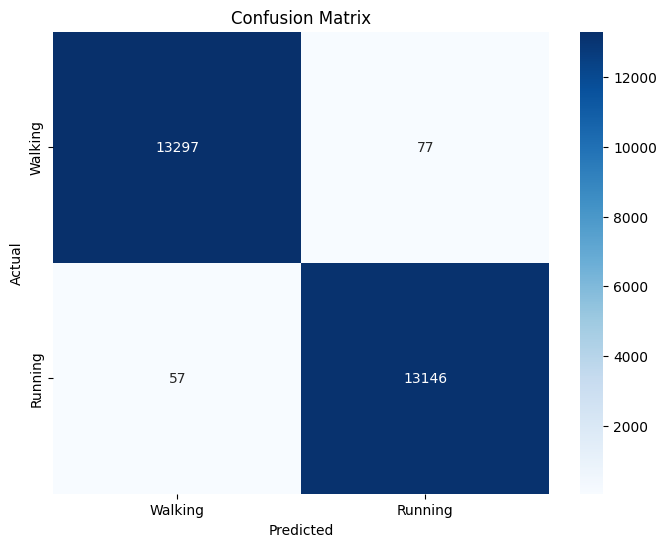

In [124]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

labels = ['Walking', 'Running']
cm = confusion_matrix(y_test, y_pred_gs)
plot_confusion_matrix(cm, labels)

# 3. KNN Algorithm

In [45]:
#initialize and tain KNN classifier
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
#predict on testing set
y_pred_knn=KNN.predict(X_test)

In [54]:
#Evaluate model performance
print('Accurancy',accuracy_score(y_test,y_pred_knn))
print('Classification Report :\n',classification_report(y_test,y_pred_knn))

Accurancy 0.9961620950445874
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13374
         1.0       1.00      1.00      1.00     13203

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



# 4. SVM Algorithm

In [102]:
#importing and installing SVM
from sklearn.svm import SVC

#initialize and trains SVM classifier
SVM=SVC(kernel='rbf',C=1)
SVM.fit(X_train,y_train)


SVC(C=1)

In [103]:
#predict on testing set
y_pred1=SVM.predict(X_test)

In [104]:
#Evaluate model performance
print('Accurancy',accuracy_score(y_test,y_pred1))
print('Classification Report :\n',classification_report(y_test,y_pred1))

Accurancy 0.9568800090303646
Classification Report :
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     13374
         1.0       0.92      0.99      0.96     13203

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



# 5. Decision Tree Algorithm

In [105]:
from sklearn.tree import DecisionTreeClassifier
#initialize and tain Decision Tree
classifierdt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random',random_state=42)
classifierdt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       random_state=42, splitter='random')

In [106]:
#predict on testing set
y_pred2=classifierdt.predict(X_test)

In [107]:
#Evaluate model performance
print('confusion_matrix:\n ',confusion_matrix(y_test,y_pred2))
print('Accuracy: ',accuracy_score(y_test,y_pred2))
print('precision_score: ',precision_score(y_test,y_pred2))
print('recall_score:',recall_score(y_test,y_pred2))
print('f1_score: ',f1_score(y_test,y_pred2))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred2))
print('Classification Report :\n',classification_report(y_test,y_pred2))

confusion_matrix:
  [[13215   159]
 [  319 12884]]
Accuracy:  0.9820145238363999
precision_score:  0.987809553016944
recall_score: 0.9758388245095811
f1_score:  0.9817877009830068
roc_auc_score:  0.9819750425822916
Classification Report :
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     13374
         1.0       0.99      0.98      0.98     13203

    accuracy                           0.98     26577
   macro avg       0.98      0.98      0.98     26577
weighted avg       0.98      0.98      0.98     26577



### PROJECT OUTCOMES 
## Accuracy_Score 
1. Logistic Regresssion - 94%
2. Decision Tree - 98%
3. Random Forest - 99%
4. Support Vector Machine - 96%
5. K-Nearest Nieghbors -  100%

### CONCLUSION

- **Logistic Regression**: This model achieved an accuracy score of 0.94. While it's a decent score, it may not be the best choice if higher accuracy is crucial for your task. You might want to consider more complex models if you need better performance.


- **Decision Tree**: With an accuracy score of 0.98, the Decision Tree model performs very well on your dataset. It's a strong candidate for your task, and its simplicity makes it easy to interpret.


- **Random Forest**: The Random Forest model also scored 0.99 in accuracy, indicating excellent performance. Random Forest is an ensemble method based on Decision Trees and is known for its robustness and accuracy.


- **Support Vector Machine**: SVM achieved an accuracy score of 0.96, which is reasonable but it's very nearest to the scores of the Decision Tree and Random Forest. SVM can be effective in some cases, but it might not be the best choice for your specific dataset.


- **K-Nearest Neighbors**: The KNN achieved an accuracy score of 1.0, which is high score for good performance on a given dataset.


- These results helped identify the most effective algorithms for this dataset,with **Random Forest and KNN models performing exceptionally well.**

## CHALLENGES FACED

* I encountered significant issues related to time formatting.The dataset included timestamps with nanosecond precision, which required careful handling to ensure accurate time-based calculations and analyses. The challenge was to clean, process, and standardize these timestamps while maintaining their precision, which was critical for high-resolution activity tracking.



* While doing hyperparameter its trying out all the possibilities can consume a lot of computer power. Here we used RandomsearchCV to get more efficiently. It performed well but it takes a lot of time to get best parameters.